# WORK GROUP - GROUP 7

## Orthogonal Learning

In [1]:
install.packages("hdm")
install.packages("xtable")
library(hdm)

set.seed(1)
B= 50 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y = 5*(D) + X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

also installing the dependencies 'checkmate', 'Formula'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rodri\AppData\Local\Temp\RtmpKkYuX9\downloaded_packages
package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rodri\AppData\Local\Temp\RtmpKkYuX9\downloaded_packages


Warning message:
"package 'hdm' was built under R version 3.6.3"

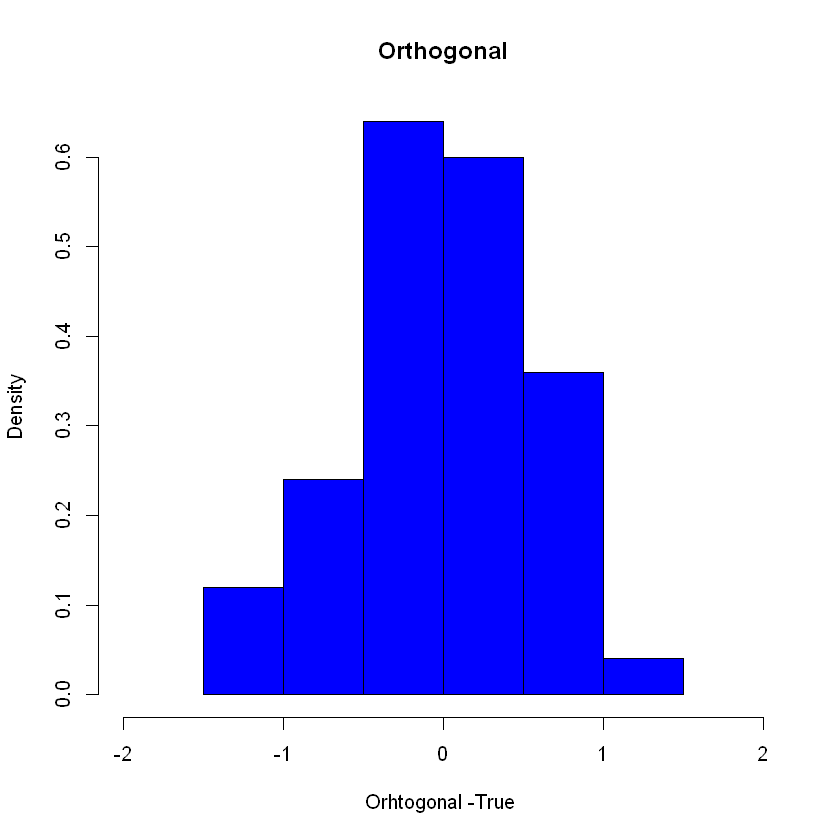

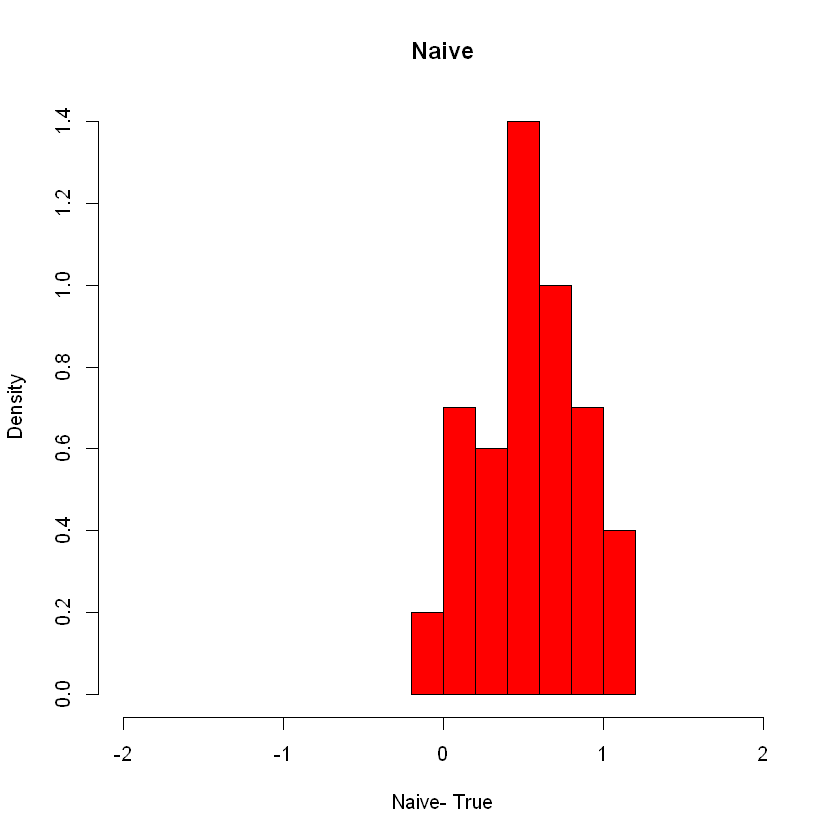

In [4]:
hist(Orthogonal-5,col=4,xlim=c(-2, 2), freq=F, xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2,xlim=c(-2, 2), freq=F, xlab= "Naive- True", main = "Naive")




In [70]:
library(hdm)

set.seed(1)
B= 100 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D + X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}

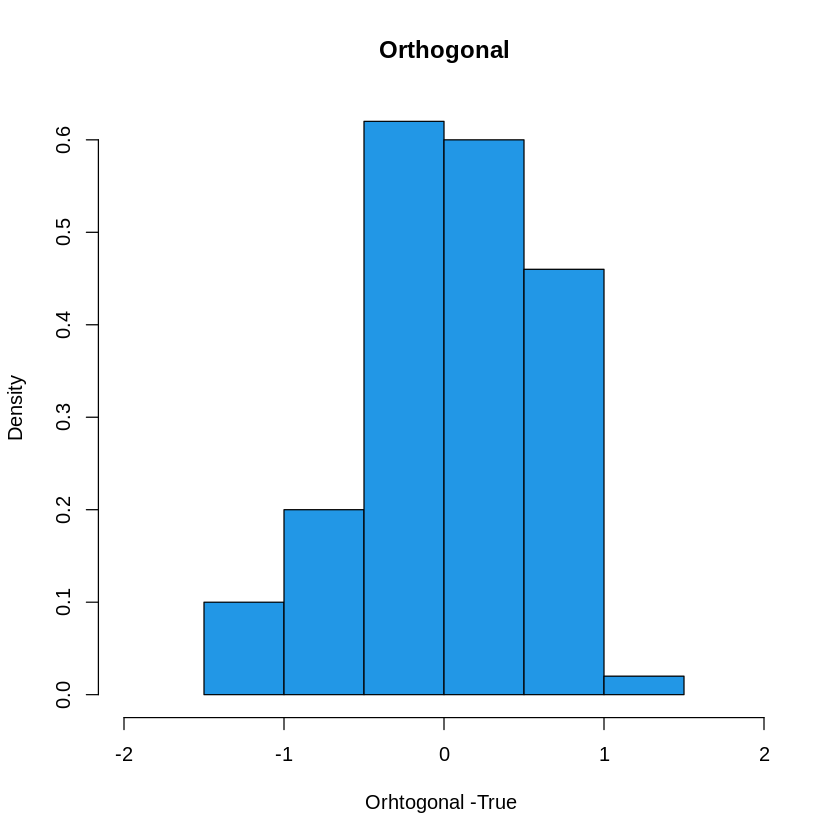

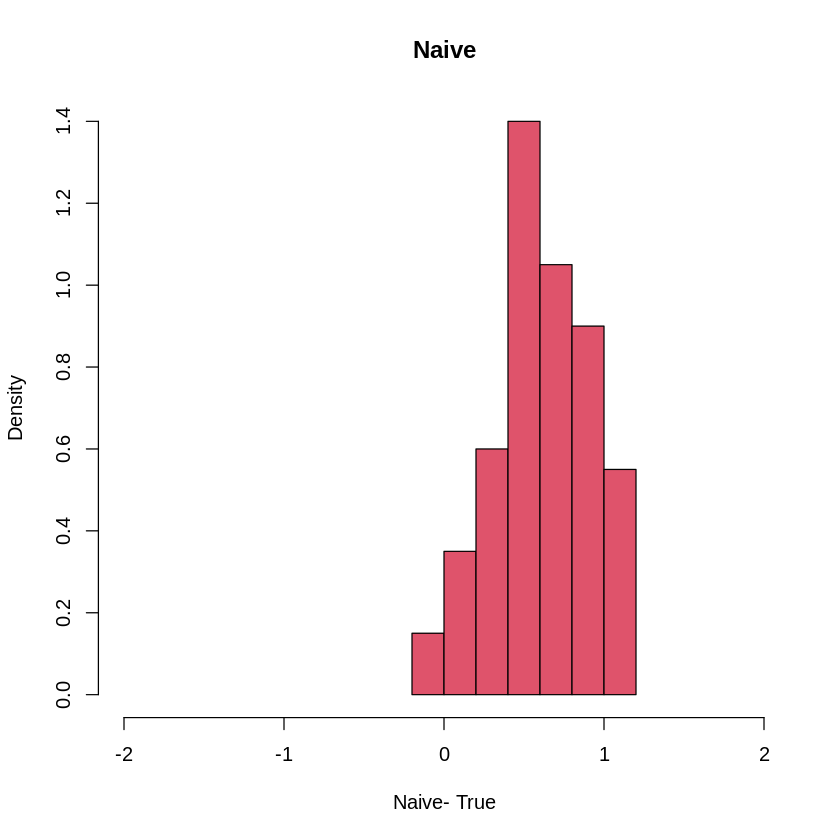

In [73]:
hist(Orthogonal-5,col=4, freq=F,xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2, 2), xlab= "Naive- True", main = "Naive")

In [5]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=100
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2

X=matrix(rnorm(n*p), n, p)
    
    
D=   X%*%gamma + rnorm(n)/4

Y =  5*D + X%*%beta + rnorm(n)

# single selection method

SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso


if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}

if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}



#partialling out

resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


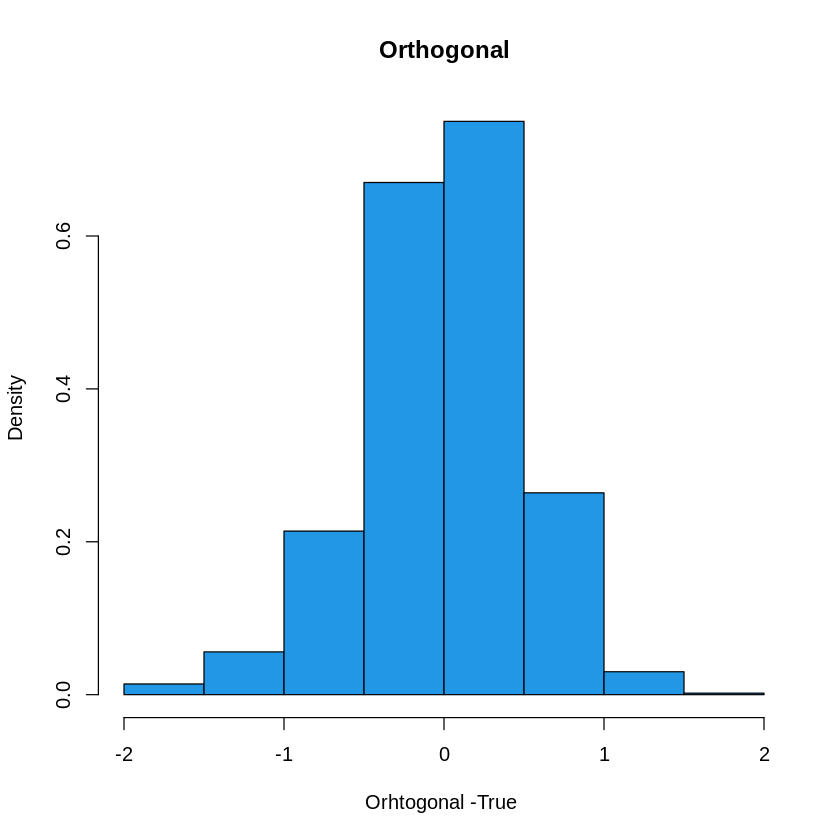

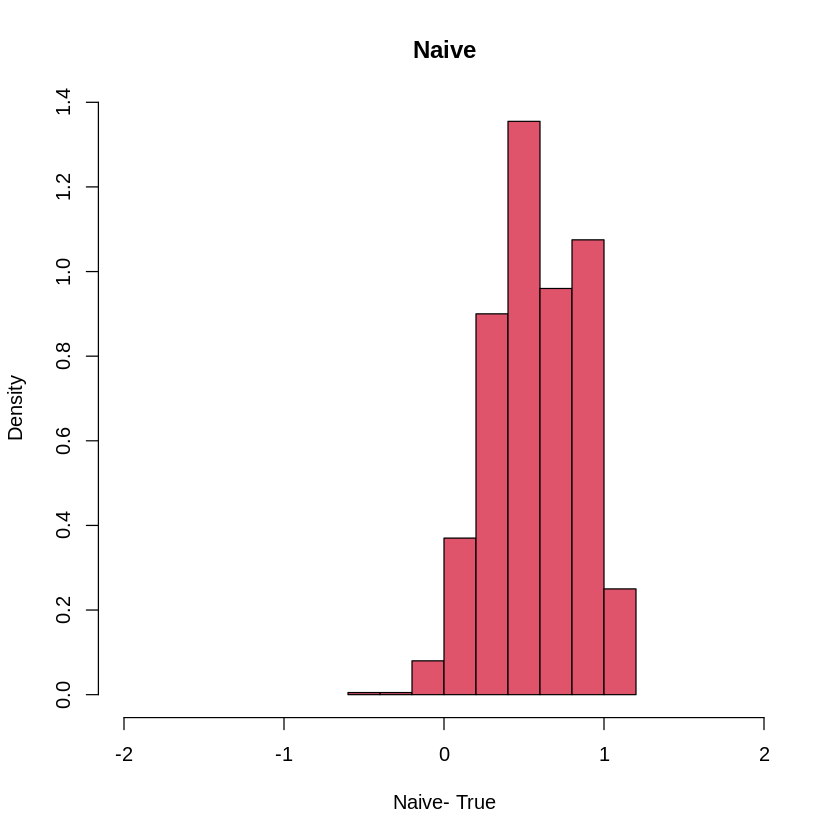

In [75]:
hist(Orthogonal-5,col=4, freq=F,xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-5, col=2, freq=F, xlim= c(-2, 2), xlab= "Naive- True", main = "Naive")

Histograms show an expected pattern that mantains even when we increase the number of simulations. We would expect that the histograms are centered on 0 since the DGP is denoted by:

$$\begin{align}
\ Y &amp;=\rho D  + \beta' W + \epsilon_1 \\
\ \rho = 5 \\
\ D &amp;=\gamma' W + \epsilon_2 \\
\end{align}$$
And since we asked for the histogram of $\hat{\rho}$ - $5$.

Orthogonal estimators: The histogram of the estimators obtained by the Double Lasso is centered on 0. These estimation method takes advantage of the Neyman Orthogonality.
Naive estimators: The histogram of the estimators obtained by the naive approach is not centered on 0. This means that the Naviwe method, in average, does estimate biased parameters
Since we defined in the DGP that the Variable of interest $D$ is a function of the $X$ covariates, we expecto to obtain biased estimators when using the Naive Method . Therefore the Naive method estimators are biased because the doesn't get rid of some variables effects that could be affecting the result variable $Y$. On the other hand, the second method gets rid of other variables effect on $D$ and in the next step obtains unbiased estimators as we could seen

# Part 2

## Double Lasso

We know that the Lasso approach is useful for estimating a model with a large number of covariates relative to the number of observations (when $\frac{p}{n}$ is not small). The Double Lasso method efficiently selects the relevant covariates for said estimation through two Lasso regression and an OLS one.

We want to estimate the following equation:

$$\label{original}
Y = \alpha D + \beta 'W+ \epsilon_1 \tag{1}.
$$
Where D is our variable of interest, and W is a set of control variables.

The Double Lasso approach consists of estimating $(2)$ and $(3)$ via Lasso:

$$\label{Y} 
Y = \gamma_{YW} 'W+ \mu_{YW} \tag{2}
$$$$\label{D}
D = \gamma_{DW} 'W+ \mu_{DW} \tag{3}
$$
Once we run these regressions, we estimate the error of each equation, that is $\hat\mu_{YW}$ and $\hat\mu_{DW}$.

Finally, we estimate $(4)$ using OLS:

$$\label{mu}
\hat\mu_{YW} = \alpha\hat\mu_{DW}+ \epsilon_2 \tag{4}
$$
Note that the parameter $\alpha$ is the same as the one obtained from $(1)$.

## Replication

In this case, we test the convergence hypothesis proposed by Solow-Swan. We propose the following model:

$$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$

Where $Y$ is the growth rate of a certain country, $D$ is the initial wealth level of said country, and $W$ is a set of control variables related to each country's institutional, educational, and similar characteristics.

In [7]:

library(hdm)
library(xtable)

In [9]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "D:/Cursos/2021-2/Estadística Aplicada/Labs/GrowthData.RData")

In [10]:
library(hdm)
growth <- GrowthData
attach(growth)
names(growth)

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

In [11]:
dim(growth)

[1] 90 63

The sample contains 90 countries and 63 controls. Thus 𝑝≈60, 𝑛=90 and 𝑝/𝑛 is not small. We expect the least squares method to provide a poor estimate of 𝛽1. We expect the method based on partialling-out with Lasso to provide a high quality estimate of 𝛽1.

To check this hypothesis, we analyze the relation between the output variable 𝑌 and the other country's characteristics by running a linear regression in the first step.


## Method 1 : OLS

In [13]:
reg.ols <- lm(Outcome~.-1,data=growth)
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [14]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS")
tab1<- xtable(table, digits = 3)
tab1

,estimator,standard error,lower bound CI,upper bound CI
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424


In this case, $\beta_1 \approx -0.0094$ which is consistent with the convergence hypothesis, which indicates that poor countries do catch up with wealthier countries. However, we note that this estimator is not significant, given the $t-statistic$ and the confidence interval.

In this case, it is better to test how Lasso would perform. For this, we will use the double lasso aproach, with different tools, following the steps previously indicated.

## Method 2: Double Lasso with Theorical Lambda

In [15]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)

[1] 90 60

In [16]:
library(hdm)
r.y <- rlasso(x=W,y=Y)$res
r.d <- rlasso(x=W,y=D)$res
partial.lasso <- lm(r.y ~ r.d)
est_lasso<-partial.lasso$coef[2]
std_lasso<-summary(partial.lasso)$coef[2,2]
ci_lasso<-confint(partial.lasso)[2,]

In [17]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso theorical lambda")
tab3<- xtable(table, digits = 3)
tab3

,estimator,standard error,lower bound CI,upper bound CI
Double Lasso theorical lambda,-0.04981147,0.01393636,-0.07750705,-0.02211588


In this estimation, we obtain a negative, statistically significant $\beta_1$, which confirms the convergence hypothesis of the Solow-Swan model

## Method 3: Double Lasso partialling derict

In [18]:
Y <- growth[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- growth[, 3, drop = F] # target regressor
dim(W)

[1] 90 60

In [19]:
lasso.effect = rlassoEffect(x = W, y = Y, d = D, method = "partialling out")
est_lasso2<-summary(lasso.effect)$coef[,1]
std_lasso2<-summary(lasso.effect)$coef[,2]
lower_ci_lasso<-est_lasso2 - 1.96*std_lasso2
upper_ci_lasso<-est_lasso2 + 1.96*std_lasso2

In [20]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso2,std_lasso2,lower_ci_lasso,upper_ci_lasso)
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso parting out")
tab2<- xtable(table, digits = 3)
tab2

,estimator,standard error,lower bound CI,upper bound CI
Double Lasso parting out,-0.04981147,0.01393636,-0.07712673,-0.0224962



As the former Lasso estimation, here too we obtain a negative, statistically significant $\beta_1$.

## Method 4: Double Lasso with Cross Validation

In [21]:
Y <- as.matrix(growth)[, 1, drop = F] # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- as.matrix(growth)[, 3, drop = F] # target regressor

In [27]:
library(glmnet)
lasso_cv  <- cv.glmnet(x=W,y=Y, family="gaussian", alpha=1)
r_lasso_cv <- predict(lasso_cv,newx=W)
r.Y <- Y-r_lasso_cv 

# Part. out d
rlasso.cv  <- cv.glmnet(x=W,y=D, family="gaussian", alpha=1)
lasso_predict <- predict(rlasso.cv,newx=W)
r.D <- Y- lasso_predict 
# partial lasso
partial.lasso2 <- lm(r.Y ~ r.D)
est_lasso.partial <- partial.lasso2$coef[2]
est_lasso.partial
std_lasso.partial <- summary(partial.lasso2)$coef[2,2]
ci_lasso.partial <- confint(partial.lasso2)[2,]

r.D 
-0.004512044

In [28]:
library(xtable)
table <- matrix(0, 1, 4)
table[1,1:4]   <- c(est_lasso.partial,std_lasso.partial,ci_lasso.partial[1],ci_lasso.partial[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso Cross")
tab4<- xtable(table, digits = 3)
tab4

,estimator,standard error,lower bound CI,upper bound CI
Double Lasso Cross,-0.004512044,0.007316562,-0.01905217,0.01002809


# Summary and Plot

In [29]:
library(xtable)
table <- matrix(0, 4, 4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
table[2,1:4]   <- c(est_lasso2,std_lasso2,lower_ci_lasso,upper_ci_lasso)
table[3,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
table[4,1:4]   <- c(est_lasso.partial,std_lasso.partial,ci_lasso.partial[1],ci_lasso.partial[2])
colnames(table)<- c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table)<- c("OLS","Double Lasso direct", "Double Lasso theorical lambda","Double Lasso Cross")
tab5<- xtable(table, digits = 3)
tab5

,estimator,standard error,lower bound CI,upper bound CI
OLS,-0.009377989,0.029887726,-0.07060022,0.05184424
Double Lasso direct,-0.049811465,0.013936358,-0.07712673,-0.02249620
Double Lasso theorical lambda,-0.049811465,0.013936358,-0.07750705,-0.02211588
Double Lasso Cross,-0.004512044,0.007316562,-0.01905217,0.01002809


We notice that OLS performs the worst of all models, estimating a β1 with the highest standard error. The Cross-Validation method also performs poorly, estimating a non-statisically significant β1 . All the other Lasso methods estimate a statistically significant β1≈−0.049 . Overall, we can confirm the convergence hypothesis of the Solow-Swan model, which tells us that poor countries grow faster than wealthier countries.